# Overview

This is the first nodebook of the project, EDA (Exploratory Data Analysis) of the data, including statistics, plots, dimension reduction, etc.

### Load data and show general informaion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
# Load train and test data
train_path = "/kaggle/input/digit-recognizer/train.csv"
test_path = "/kaggle/input/digit-recognizer/test.csv"
raw_df_train = pd.read_csv(train_path)
raw_df_test = pd.read_csv(test_path)
raw_df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
raw_df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
raw_df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Missing data

Since the features are pixels of images, there is no need to check any missing data, we can skip this step.

### Data inspection

Now let's take a look into how the data looks like.

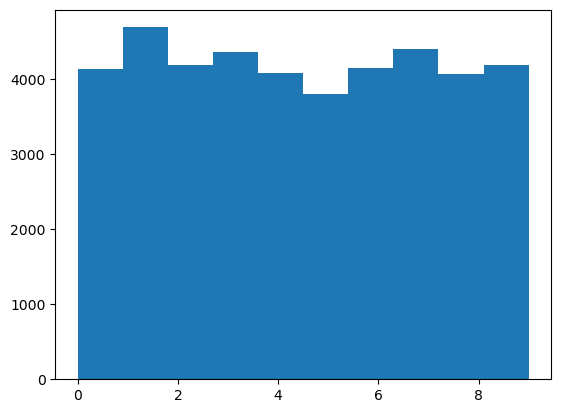

In [7]:
# distribution of the labels in training set
plt.hist(raw_df_train['label'])
plt.show()

The labels are roughly evenly distributed, we do not need to take actions to fix any "unblance" issue.

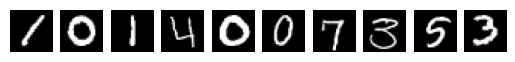

In [14]:
import random

# Sample some images how they looks like
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(raw_df_train.iloc[i][1:].values.reshape((28, 28)), cmap='gray')
    
plt.show()


# Dimension reduction

I will use PCA (Principal Component Analysis) and NMF (Non-Negative Matrix Factorization) to reduce the dimensions to:

* Explor with reduced dimensions of 2D and 3D, plot the data to see if the clusters are separated well.
* Plot how the reduced components looks like, to understand the difference of PCA and NMF.

In [17]:
# help function for convert the reduced features array to dataframe for 2d plotting
def plot_2d(X_2d, y, model=''):
    df = pd.DataFrame(X_2d)
    df['label'] = y
    df.columns = ['x', 'y', 'label']
    # Converting label to string to get discrete colors in plot
    df['label'] = df['label'].astype(str)
    fig = px.scatter(df, x='x', y='y', color='label', hover_data=['label'])
    fig.update_layout(title = f'MNIST {model} 2D')
    fig.show()

# help function for convert the reduced features array to dataframe for 3d plotting
def plot_3d(X_3d, y, model=''):
    df = pd.DataFrame(X_3d)
    df['label'] = y
    df.columns = ['x', 'y', 'z', 'label']
    # Converting label to string to get discrete colors in plot
    df['label'] = df['label'].astype(str)
    
    fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', hover_data=['label'])
    fig.update_layout(title = f'MNIST {model} 3D')
    fig.show()

In [16]:
from sklearn.model_selection import train_test_split

X = raw_df_train.values[:, 1:]
y = raw_df_train.values[:, 0]

# To save running time, we only work on a sub set of the data
X_eda, _ , y_eda, _ = train_test_split(X, y, train_size=0.1, random_state=42)
y_eda.shape

(4200,)

### Dimension reduction - PCA

We try with the first 2 principal components, and see how well it separate the digits

In [11]:
from sklearn.decomposition import PCA

plot_2d(PCA(n_components=2, svd_solver='full').fit_transform(X_eda), y_eda, 'PCA')

Then try with the first 3 principal components, and see how well it separate the digits

In [18]:
plot_3d(PCA(n_components=3, svd_solver='full').fit_transform(X_eda), y_eda, 'PCA')

#### Observations:

* With both first 2 and 3 principal components, there are some separation, but they can not be well separated. 
* '1' is relatively separated from others; '4', '9', '7' are mixed together, etc. This is quite intuitive, it depends if the original digits looks similar or not.


#### Plot components
And we create more principal components and plot them, how they looks like

In [20]:
import math

# Fit PCA with first n principle components
def plot_pca_components(n=2):
    pca = PCA(n_components=n, svd_solver='full', random_state=99)
    pca_festures = pca.fit(X_eda)
    print(f"Total variation explaned: {pca.explained_variance_ratio_.sum()}%")

    # Scale the components to be 0-255 for plotting
    scaled_components = (255/(pca.components_.max()-pca.components_.min())) * pca.components_
    scaled_components = scaled_components - scaled_components.min()
    
    for i in range(n):
        plt.subplot(math.ceil(n/5),5,i+1)
        plt.axis('off')
        plt.imshow(scaled_components[i].reshape((28, 28)), cmap='gray')
    plt.show()

Total variation explaned: 0.33339536539738013%


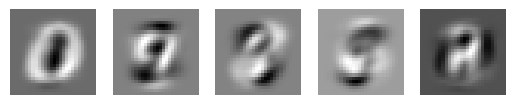

In [21]:
plot_pca_components(5)

Total variation explaned: 0.6483800819744012%


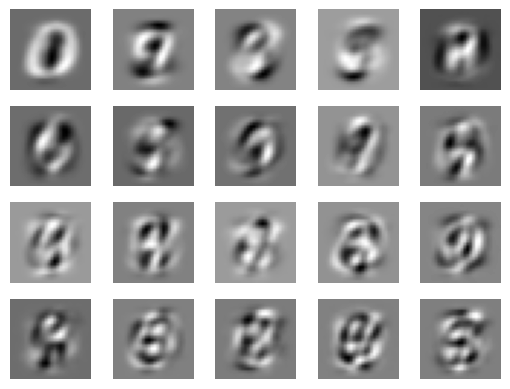

In [22]:
plot_pca_components(20)

#### What we can observe:

1. For each of principal components, it contains a full layer of the whole picture (i.e. not a part), we may call them 'meta digit's. When it tryes to recover the image from pca compnents, it basically kind of layers all the components together.
2. There is no change when we change the number of components, because they always select the direction with the most variance.
3. The components in front extract the main structures of the digits, while the later ones are more fine tuned to extract details.

### Dimension reduction - NMF

We want to do the same thing but with NMF, to see what would be the difference.

In [23]:
from sklearn.decomposition import NMF

plot_2d(NMF(n_components=2, random_state=99).fit_transform(X_eda), y_eda, "NMF")

In [24]:
plot_3d(NMF(n_components=3, random_state=99).fit_transform(X_eda), y_eda, "NMF")

#### Observations:
* With 2 or 3 components, it seems the digits confuse even more than the PCA.
* I think it is because the factoration has a limitation of non-negative in comparing with PCA, so it not always catch the feature vectors of most variance.



#### Plot components
Now let's see how the NMF components looks like.

In [32]:
import math

def plot_nmf_components(n=2):
    nmf = NMF(n_components=n, random_state=99, max_iter=300)
    nmf.fit(X_eda)
    
    # Scale the values to 0-255 as well
    scaled_components = nmf.components_ * 255 / nmf.components_.max()

    for i in range(n):
        plt.subplot(math.ceil(n/5),5,i+1)
        plt.axis('off')
        plt.imshow(scaled_components[i].reshape((28, 28)), cmap='gray')
    plt.show()

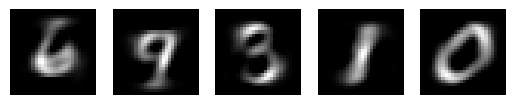

In [33]:
plot_nmf_components(5)

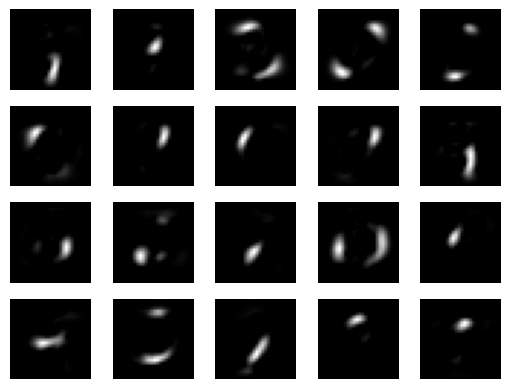

In [34]:
plot_nmf_components(20)

#### Observations:

1. The shape of each component changes when the number of components changes. This is because the NMF components decompose the images to different parts, and compose the parts from different components when recover the images.
2. There is no weights among the components, each component contains roughly similar variances
3. When there is less components, each part is big and complete. When the number of components increases, each part becomes smaller.

### Dimension Reduction - T-SNE

T-SNE is the state-of-the-art method of dimension reduction. It aims to keep the points in the neighbourhood also in the reduced dimension, while it does not guarantee the relative distances between the poinds. So it is a good way to use it for dimension reduction for clustering and visualisation, but not suitable to recover the vector in the original dimension (Actually it is not possible, because the mapping back to the original dimension is not reserved)

In [28]:
from sklearn.manifold import TSNE

plot_2d(TSNE(n_components=2, random_state=99).fit_transform(X_eda), y_eda, "T-SNE")


In [29]:
plot_3d(TSNE(n_components=3, random_state=99).fit_transform(X_eda), y_eda, "T-SNE")

#### Observations:

1. It is significantly better separated digis with both 2 and 3 dimensions from TNSE. Even though there are still some overlapping, but in general they are much separated.
2. It could be a good way to use the reduced dimensions data to do clustering, which we will explore in the next notebook.